In [3]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 1.Tiền xử lý dữ liệu

In [4]:
df = pd.read_excel("/content/drive/MyDrive/AI/dataset/Energy_Power_Weather.xlsx", sheet_name=1)
# df = pd.read_csv("/content/drive/MyDrive/AI/dataset/Energy_Weather.csv")
df

,Timestamp,Watt,TempMin,TempMax,Weather,Time
0,2019-01-28 00:00:00,0.0,18,23,Patchy rain possible,00:00:00
1,2019-01-28 00:15:00,0.0,18,23,Patchy rain possible,00:15:00
2,2019-01-28 00:30:00,0.0,18,23,Patchy rain possible,00:30:00
3,2019-01-28 00:45:00,0.0,18,23,Patchy rain possible,00:45:00
4,2019-01-28 01:00:00,0.0,18,23,Patchy rain possible,01:00:00
...,...,...,...,...,...,...
168283,2023-11-25 22:45:00,0.0,21,24,Light rain shower,3 10:45:00 PM
168284,2023-11-25 23:00:00,0.0,21,24,Light rain shower,3 11:00:00 PM
168285,2023-11-25 23:15:00,0.0,21,24,Light rain shower,3 11:15:00 PM
168286,2023-11-25 23:30:00,0.0,21,24,Light rain shower,3 11:30:00 PM


In [5]:
# Chuyển cột 'Timestamp' sang kiểu datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Lấy chỉ thời gian và định dạng thành chuỗi '00:00:00'
df['Time'] = df['Timestamp'].dt.strftime('%H:%M:%S')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Tạo cột mới cho giờ
df['Hour'] = df['Timestamp'].dt.hour

df['Date'] = df['Timestamp'].dt.date

df['YearMonth'] = df['Timestamp'].dt.to_period('M').astype(str)

df

,Timestamp,Watt,TempMin,TempMax,Weather,Time,Hour,Date,YearMonth
0,2019-01-28 00:00:00,0.0,18,23,Patchy rain possible,00:00:00,0,2019-01-28,2019-01
1,2019-01-28 00:15:00,0.0,18,23,Patchy rain possible,00:15:00,0,2019-01-28,2019-01
2,2019-01-28 00:30:00,0.0,18,23,Patchy rain possible,00:30:00,0,2019-01-28,2019-01
3,2019-01-28 00:45:00,0.0,18,23,Patchy rain possible,00:45:00,0,2019-01-28,2019-01
4,2019-01-28 01:00:00,0.0,18,23,Patchy rain possible,01:00:00,1,2019-01-28,2019-01
...,...,...,...,...,...,...,...,...,...
168283,2023-11-25 22:45:00,0.0,21,24,Light rain shower,22:45:00,22,2023-11-25,2023-11
168284,2023-11-25 23:00:00,0.0,21,24,Light rain shower,23:00:00,23,2023-11-25,2023-11
168285,2023-11-25 23:15:00,0.0,21,24,Light rain shower,23:15:00,23,2023-11-25,2023-11
168286,2023-11-25 23:30:00,0.0,21,24,Light rain shower,23:30:00,23,2023-11-25,2023-11


In [6]:
df_tem = df.groupby(["Date", "Weather"]).agg({'TempMin': 'mean', 'TempMax': 'mean', 'Watt': 'sum'}).reset_index()
df_tem = df_tem.drop(columns=["Date"], axis=1)
df_tem["Watt"] = df_tem["Watt"] / 1000
df_tem

,Weather,TempMin,TempMax,Watt
0,Patchy rain possible,18.0,23.0,8.972480
1,Patchy rain possible,20.0,25.0,25.845085
2,Patchy rain possible,21.0,24.0,36.149643
3,Sunny,21.0,25.0,65.131089
4,Moderate rain at times,19.0,23.0,36.141824
...,...,...,...,...
1748,Patchy rain possible,22.0,26.0,45.215285
1749,Light rain shower,20.0,25.0,19.460444
1750,Light rain shower,23.0,25.0,56.680677
1751,Patchy rain possible,22.0,26.0,56.748063


In [7]:
# Tạo các biến giả từ các biến phân loại trong df_x và loại bỏ một cột dummy để tránh đa cộng tuyến
data_dummies = pd.get_dummies(df_tem, drop_first=True)
# Chuyển đổi kiểu dữ liệu của tất cả các giá trị trong DataFrame data_dummies thành float
data_dummies = data_dummies.astype(float)
data_dummies

,TempMin,TempMax,Watt,Weather_Heavy rain at times,Weather_Light rain shower,Weather_Mist,Weather_Moderate or heavy rain shower,Weather_Moderate rain at times,Weather_Overcast,Weather_Partly cloudy,Weather_Patchy light drizzle,Weather_Patchy light rain with thunder,Weather_Patchy rain possible,Weather_Sunny,Weather_Thundery outbreaks possible,Weather_Torrential rain shower
0,18.0,23.0,8.972480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20.0,25.0,25.845085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,21.0,24.0,36.149643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21.0,25.0,65.131089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.0,23.0,36.141824,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,22.0,26.0,45.215285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1749,20.0,25.0,19.460444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1750,23.0,25.0,56.680677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1751,22.0,26.0,56.748063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
# weather = {'Patchy rain possible': 0.27,
#            'Sunny': 0.99,
#            'Moderate rain at times': 0.22,
#            'Overcast': 0.5,
#            'Partly cloudy': 0.67,
#            'Cloudy': 0.56,
#            'Heavy rain at times': 0.16,
#            'Moderate or heavy rain shower': 0.11,
#            'Light rain shower': 0.33,
#            'Mist': 0.44,
#            'Patchy light rain with thunder': 0.24,
#            'Thundery outbreaks possible': 0.31,
#            'Patchy light drizzle': 0.39,
#            'Torrential rain shower': 0.01
# }

# df['Weather'] = df['Weather'].map(weather)

In [66]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date_of_Year"] = df["Date"].dt.dayofyear
df['Date_of_Year'] = (df['Date_of_Year'] - 1) / (366 - 1)
df = df.drop(columns=["Date"], axis=1)
df

,kilowatt-hours,TempMin,TempMax,Weather,Wind_speed,Humidity,ALLSKY_SFC_SW_DWN,Date_of_Year
0,2.165,18,23,0.27,2.81,88.88,1.99,0.073973
1,6.470,20,25,0.27,3.48,88.50,2.83,0.076712
2,9.157,21,24,0.27,3.29,87.06,5.41,0.079452
3,16.269,21,25,0.99,1.98,82.44,5.83,0.082192
4,8.447,19,23,0.22,2.64,83.88,5.06,0.084932
...,...,...,...,...,...,...,...,...
1757,4.514,21,23,0.33,3.85,85.00,4.07,0.884932
1758,11.096,22,26,0.27,2.61,82.06,4.53,0.887671
1759,4.860,20,25,0.33,2.69,84.19,2.83,0.890411
1760,13.984,23,25,0.33,3.73,85.31,4.98,0.893151


# 2.Tạo dữ liệu

In [8]:
from sklearn.model_selection import train_test_split

X = []
y = []

n = 14
m = 7

dataframe = data_dummies.values
for i in range(len(dataframe) - (m + n)):
    X.append(dataframe[i:i+n])
    y.append(dataframe[i+n:i+n+m, 2])
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1732, 14, 16) (1732, 7)


# 3.Huấn luyện

### 3.1. LSTM

In [87]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense


def build_lstm(X_train, y_train):
    n_samples, timesteps, n_feature = X_train.shape
    output_dim = y_train.shape[1]
    model = Sequential()
    model.add(LSTM(256, activation="tanh", input_shape=(timesteps, n_feature)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(output_dim))
    model.compile(loss="mse", optimizer='adam', metrics=["mae"])
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    return model

md = build_lstm(X_train, y_train)
print(md.evaluate(X_test, y_test, verbose=0))

[280.6499328613281, 12.852800369262695]


### 3.2 CNN-LSTM

In [9]:
from keras.layers import Conv1D
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, TimeDistributed, Permute, Reshape
from keras.utils import plot_model

def build_cnn_lstm(X_train, y_train):
    output_dim = y_train.shape[1]
    n_samples, time_step, n_feature = X_train.shape

    md = Sequential()
    md.add(Conv1D(filters=256, padding="same", kernel_size=3, activation='relu', input_shape=(time_step, n_feature)))
    md.add(Dropout(0.2))
    md.add(LSTM(256, activation='tanh'))
    md.add(Dense(128, activation='relu'))
    md.add(Dropout(0.2))
    md.add(Dense(output_dim))
    md.compile(loss="mse", optimizer="adam", metrics=["mae"])
    md.build(input_shape=(None, time_step, n_feature, 1))
    md.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
    return md

cnn_lstm = build_cnn_lstm(X_train, y_train)
print(cnn_lstm.evaluate(X_test, y_test, verbose=0))
# plot_model(cnn_lstm, show_shapes=True)


[244.86566162109375, 11.90853214263916]


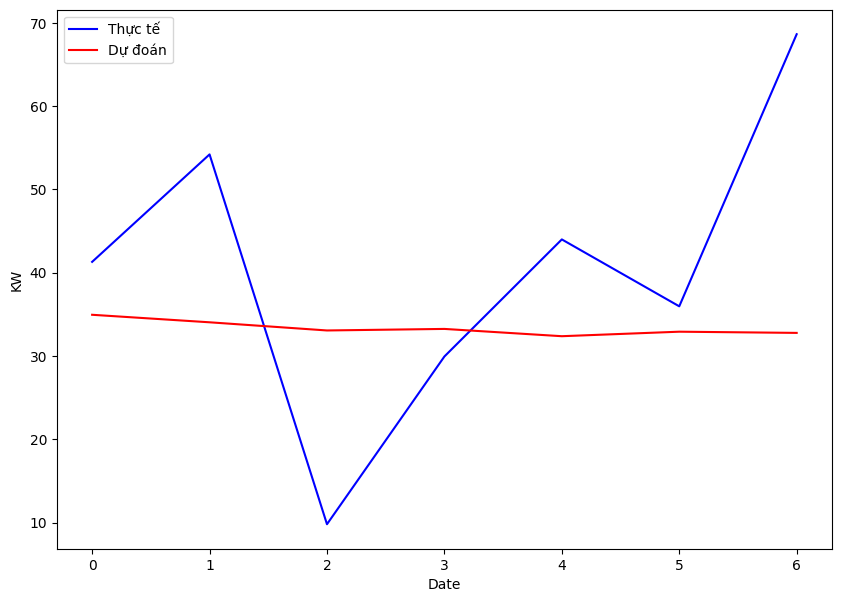

In [30]:
import matplotlib.pyplot as plt

r = 49
y_true = y_test[r:r+1].reshape(-1, )
y_pred = cnn_lstm.predict(X_test[r:r+1], verbose=0).reshape(-1, )
date = np.arange(7)

plt.figure(figsize=(10, 7))
plt.plot(date, y_true, 'b-', label='Thực tế')
plt.plot(date, y_pred, 'r-', label='Dự đoán')
plt.xlabel('Date')
plt.ylabel('KW')
plt.legend()
plt.show()


## 3.3 Conv LSTM custom


In [ ]:
from keras import Model
from keras.layers import Input, Dense, MaxPooling1D, Conv1D, LSTM, Flatten, RepeatVector
from keras.layers import Dropout, Add, concatenate
from keras.utils import plot_model


def build_custom_model(X_train, y_train):
    n_samples, time_step, n_feature = X_train[0].shape
    input_1 = Input(shape=(time_step, n_feature))
    x1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Conv1D(filters=128, kernel_size=3, activation='relu')(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Dropout(0.2)(x1)
    x1 = Flatten()(x1)
    x1 = RepeatVector(time_step)(x1)
    x1 = LSTM(200, activation='tanh')(x1)
    x1 = Dropout(0.2)(x1)
    x1 = Dense(100, activation='relu')(x1)
    x1 = Dense(1)(x1)

    input_2 = Input(shape=(time_step, 1))
    x2 = LSTM(200, activation='tanh')(input_2)
    x2 = Dropout(0.2)(x2)
    x2 = Dense(100, activation='relu')(x2)
    x2 = Dense(1)(x2)

    x = concatenate([x1, x2])
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(7)(x)

    md = Model(inputs=[input_1, input_2], outputs=output)
    md.compile(loss="mse", optimizer="adam", metrics=["mae"])
    md.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
    return md

train_1 = X_train[:,:,1:]
train_2 = X_train[:,:, 1]
md = build_custom_model([train_1, train_2], y_train)

Epoch 1/100
87/87 [==============================] - 6s 7ms/step - loss: 70.0108 - mae: 6.7372
Epoch 2/100
87/87 [==============================] - 1s 7ms/step - loss: 37.4950 - mae: 5.0179
Epoch 3/100
87/87 [==============================] - 1s 7ms/step - loss: 34.0200 - mae: 4.7872
Epoch 4/100
87/87 [==============================] - 1s 7ms/step - loss: 31.9835 - mae: 4.6147
Epoch 5/100
87/87 [==============================] - 1s 7ms/step - loss: 31.3784 - mae: 4.5583
Epoch 6/100
87/87 [==============================] - 1s 7ms/step - loss: 30.2694 - mae: 4.4568
Epoch 7/100
87/87 [==============================] - 1s 7ms/step - loss: 30.3175 - mae: 4.4703
Epoch 8/100
87/87 [==============================] - 1s 7ms/step - loss: 30.5899 - mae: 4.5054
Epoch 9/100
87/87 [==============================] - 1s 7ms/step - loss: 30.1655 - mae: 4.4616
Epoch 10/100
87/87 [==============================] - 1s 7ms/step - loss: 28.8577 - mae: 4.3742
Epoch 11/100
87/87 [=============================

In [ ]:
test_1 = X_test[:,:,:-1]
test_2 = X_test[:,:, -1]
print(md.evaluate([test_1, test_2], y_test, verbose=0))
print(md.predict([test_1, test_2], verbose=0)[:7])
print(y_test[0])

[338.29302978515625, 14.93432331085205]
[[27.247032]
 [46.30484 ]
 [64.57392 ]
 [60.77286 ]
 [46.20261 ]
 [26.348846]
 [36.33568 ]]
[19.272358 11.93189  13.724976 41.46099  15.496222 49.91443  37.246283]
